   Target  Alcohol  Malic_acid   Ash  Alcal_ash  Magn  Total_phenols  Flav  \
0       1    14.23        1.71  2.43       15.6   127           2.80  3.06   
1       1    13.20        1.78  2.14       11.2   100           2.65  2.76   
2       1    13.16        2.36  2.67       18.6   101           2.80  3.24   
3       1    14.37        1.95  2.50       16.8   113           3.85  3.49   
4       1    13.24        2.59  2.87       21.0   118           2.80  2.69   

   Nonflav_phenols  Proant  Color_int   Hue  diluted_wine  Proline  
0             0.28    2.29       5.64  1.04          3.92     1065  
1             0.26    1.28       4.38  1.05          3.40     1050  
2             0.30    2.81       5.68  1.03          3.17     1185  
3             0.24    2.18       7.80  0.86          3.45     1480  
4             0.39    1.82       4.32  1.04          2.93      735  
Number of Sample= 178
Number of Features= 13
Number of class 3
NUmber of samples/class...
2    71
1    59
3    48
Nam

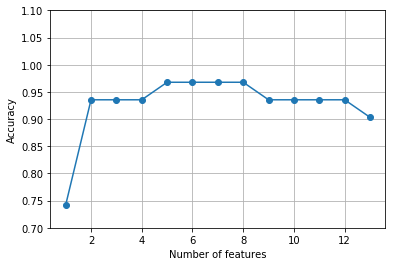

[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12), (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12), (0, 1, 2, 3, 4, 5, 6, 9, 10, 12), (0, 1, 3, 4, 5, 6, 9, 10, 12), (0, 3, 4, 5, 6, 9, 10, 12), (0, 4, 5, 6, 9, 10, 12), (4, 5, 6, 9, 10, 12), (4, 5, 6, 10, 12), (4, 6, 10, 12), (6, 10, 12), (10, 12), (12,)]
[0.9032258064516129, 0.9354838709677419, 0.9354838709677419, 0.9354838709677419, 0.9354838709677419, 0.967741935483871, 0.967741935483871, 0.967741935483871, 0.967741935483871, 0.9354838709677419, 0.9354838709677419, 0.9354838709677419, 0.7419354838709677]


In [3]:
import pandas as pd
df=pd.read_csv('/home/rituraj/Downloads/Wine.csv',header=None)
df.columns=['Target','Alcohol','Malic_acid','Ash','Alcal_ash','Magn',
            'Total_phenols','Flav','Nonflav_phenols','Proant',
            'Color_int','Hue','diluted_wine','Proline']
print(df.head())
print('Number of Sample=',df.shape[0])
print('Number of Features=',df.shape[1]-1)
X=df.iloc[:,1:]
Y=df.iloc[:,0]
print('Number of class',Y.nunique())
print('NUmber of samples/class...')
print(Y.value_counts())
print('--------------------Missing Values------------')
print(df.isnull().sum())
print('----------------Standarization----------------')
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_std=sc.fit_transform(X)
print(X_std)
print('----------------Normalization----------------')
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
X_norm=mms.fit_transform(X)
print(X_norm)
print('--------------Train size:70%, Test Size: 30%-----')
from sklearn.model_selection import train_test_split
(X_train_std,X_test_std,y_train,y_test)=train_test_split(X_std,
                    Y,test_size=0.3,random_state=123)
print(X_train_std.shape)
print(X_test_std.shape)
print('******Sequential Backword Selection*****************')
#####################################

################################SBS
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
class SBS():
    def __init__(self, estimator, k_features,scoring=accuracy_score,
        test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
    def fit(self, X, y):
        X_train, X_test, y_train, y_test =train_test_split(X, y, 
                    test_size=self.test_size, random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]
        while dim > self.k_features:
            scores = []
            subsets = []
            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        return self
    def transform(self, X):
        return X[:, self.indices_]
    def _calc_score(self, X_train, y_train, 
                          X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

#####################################
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)
import matplotlib.pyplot as plt
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.plot()
plt.show()
print(sbs.subsets_)
print(sbs.scores_)





